In [100]:
from flytracker.tracker import Tracker
from flytracker.utils import FourArenasQRCodeMask, SixteenArenasMask

import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd

%config InlineBackend.figure_format = 'svg'
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%%time

mask = np.ones((1080, 1280), dtype=np.bool) # assumes 1080 x 1280 resolution
mask[:110, :] = 0 
mask[-110:, :] = 0 
mask[:, :180] = 0
mask[:, -260:] = 0

path = '../../data/movies/seq_1(1).h264'
tracker = Tracker(mask=mask, movie_path=path, output_path='')

CPU times: user 713 µs, sys: 50 µs, total: 763 µs
Wall time: 529 µs


In [9]:
%%time
dataset = tracker.run(5000)

CPU times: user 7min 31s, sys: 1min 6s, total: 8min 37s
Wall time: 23.6 s


In [10]:
dataset

frame    ID           x           y
0         99.0   0.0  739.082275  881.693420
1         99.0   1.0  722.435852  870.738525
2         99.0   2.0  400.827423  826.554932
3         99.0   3.0  345.536713  801.657898
4         99.0   4.0  668.629272  793.200867
...        ...   ...         ...         ...
135022  5099.0  22.0  406.888889  179.911111
135023  5099.0  23.0  260.780488  440.926829
135024  5099.0  24.0  247.333333  313.692308
135025  5099.0  25.0  282.622222  428.577778
135026  5099.0  26.0  249.538462  394.717949

[135027 rows x 4 columns]

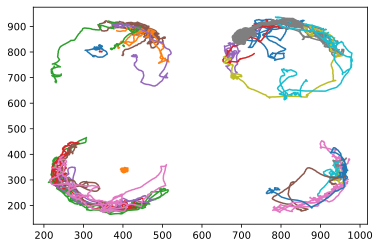

In [244]:
for fly in np.arange(tracker.n_flies):
    locs = dataset.query(f'ID == {fly}')
    plt.plot(locs.x, locs.y)
    
fly = 1
locs = dataset.query(f'ID == {fly}')
plt.plot(locs.x, locs.y, lw=4)
#plt.xlim([200, 600])
#plt.ylim([100, 500])

In [236]:
df = pd.read_csv('fly_arene_3_num_2.csv', delimiter=':').iloc[68:5069]

In [237]:
df

numFrame      X      Y   VX   VY  T/A
3960.0          99  129.0  293.0  0.0  0.0    0
4000.0         100  129.0  293.0  0.0  0.0    0
4040.0         101  129.0  293.0  0.0  0.0    0
4080.0         102  129.0  293.0  0.0  0.0    0
4120.0         103  129.0  293.0  0.0  0.0    0
...            ...    ...    ...  ...  ...  ...
203800.0      5095  182.0  341.5  0.0  0.0    0
203840.0      5096  182.0  341.5  0.0  0.0    0
203880.0      5097  182.0  341.5  0.0  0.0    0
203920.0      5098  182.0  341.5  0.0  0.0    0
203960.0      5099  182.0  341.5  0.0  0.0    0

[5001 rows x 6 columns]

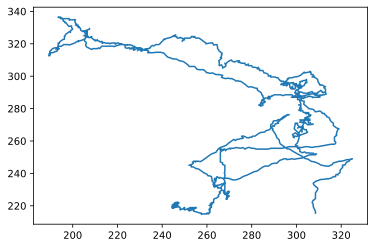

In [205]:
fly = 26
plt.plot(df.Y, df.X)
#locs = dataset.query(f'ID == {fly}')
#plt.plot(locs.x, locs.y)

In [34]:
ini_loc = df.iloc[99][['X', 'Y']].to_numpy()

In [45]:
np.argmin(np.sum((dataset.query('frame == 99')[['x', 'y']].to_numpy() - ini_loc)**2, axis=1)[:, None])

26

In [46]:
np.sum((dataset.query('frame == 99')[['x', 'y']].to_numpy() - ini_loc)**2, axis=1)[:, None]

array([[6.31582807e+05],
       [6.03477646e+05],
       [3.98528055e+05],
       [3.63373079e+05],
       [4.66225685e+05],
       [3.50202012e+05],
       [4.34759929e+05],
       [4.00367623e+05],
       [4.01262831e+05],
       [3.25744130e+05],
       [3.92280183e+05],
       [3.85503298e+05],
       [3.74300026e+05],
       [5.13804769e+05],
       [3.49537647e+05],
       [2.58231942e+05],
       [2.94520171e+05],
       [7.35416122e+05],
       [4.42791139e+05],
       [5.24371282e+05],
       [2.09238576e+05],
       [2.27524798e+04],
       [4.95071276e+03],
       [4.43471508e+03],
       [1.16706987e+04],
       [2.76938427e+03],
       [3.14365194e+02]])

In [4]:
cap = cv.VideoCapture(path) #video_name is the video being called
image = cap.read()[1] # Read the frame

In [7]:
plt.figure(figsize=(20, 20))


plt.imshow(image * mask[:, :, None] )

NameError: name 'image' is not defined

<Figure size 1440x1440 with 0 Axes>

In [157]:
cap = cv.VideoCapture(path) #video_name is the video being called
for _ in np.arange(1000):
    _ = cap.read() # Read the frame

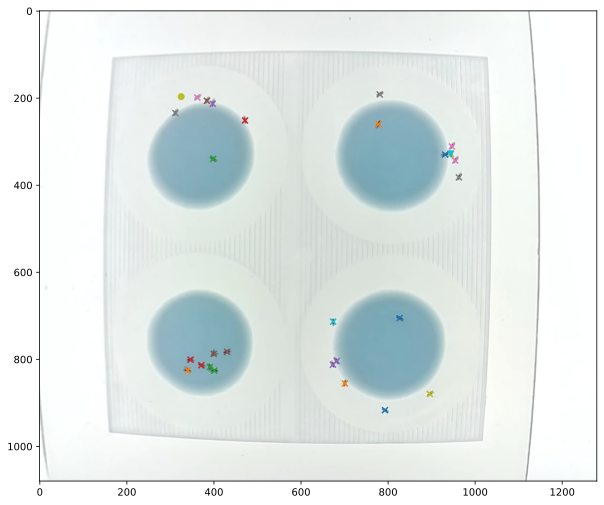

In [158]:
 ret, image = cap.read() # Read the frame
plt.figure(figsize=(10, 10))
plt.imshow(image)
#plt.scatter(ini_loc[1], ini_loc[0])
for fly in np.arange(tracker.n_flies):
    locs = dataset.query(f'ID == {fly} and frame==1000')
    plt.scatter(locs.x, locs.y, marker='x')
    if fly == 8:
        plt.scatter(locs.x, locs.y, marker='v')
    
plt.scatter(df.query('numFrame == 1000').X, df.query('numFrame == 1000').Y, marker='o')
#plt.xlim([0, 600])

In [60]:
[dataset.loc[:5000].groupby('ID')]

In [63]:
dataset.loc[:5000][['x', 'y']] - df[['X', 'Y']]

X   Y   x   y
0.0      NaN NaN NaN NaN
1.0      NaN NaN NaN NaN
2.0      NaN NaN NaN NaN
3.0      NaN NaN NaN NaN
4.0      NaN NaN NaN NaN
...       ..  ..  ..  ..
201040.0 NaN NaN NaN NaN
201080.0 NaN NaN NaN NaN
201120.0 NaN NaN NaN NaN
201160.0 NaN NaN NaN NaN
201200.0 NaN NaN NaN NaN

[9906 rows x 4 columns]

numFrame      X       Y    VX    VY  T/A
1240.0          31  334.5  182.00   0.0   0.0    0
1280.0          32  334.5  182.50   0.0   0.0    0
1320.0          33  334.5  182.50   0.0   0.0    0
1360.0          34  334.5  182.00   0.0 -15.0    0
1400.0          35  335.0  182.50  15.0  15.0    0
...            ...    ...     ...   ...   ...  ...
201040.0      5026  326.0  194.75   0.0   0.0    0
201080.0      5027  326.0  194.75   0.0   0.0    0
201120.0      5028  326.0  194.75   0.0   0.0    0
201160.0      5029  326.0  195.00   0.0   7.5    0
201200.0      5030  326.0  195.00   0.0   0.0    0

[5000 rows x 6 columns]

In [76]:
import time

KeyboardInterrupt: 

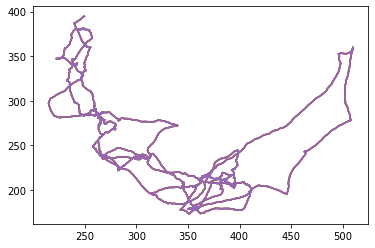

In [77]:
for fly in np.arange(27):
    plt.plot(locs.x, locs.y)
    plt.show()
    time.sleep(1)

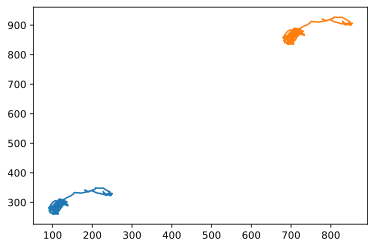

In [240]:
fly = 1
plt.plot(df.X, df.Y)
locs = dataset.query(f'ID == {fly}')
plt.plot(locs.x, locs.y)

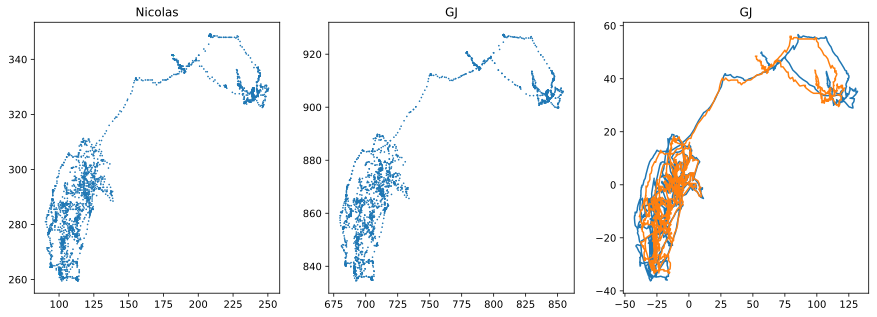

In [241]:
fly = 1
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('Nicolas')
plt.scatter(df.X, df.Y, s=0.5)
#plt.scatter(df.iloc[2000].X, df.iloc[2000].Y, color='red')

plt.subplot(132)
plt.title('GJ')
locs = dataset.query(f'ID == {fly}')
plt.scatter(locs.x, locs.y, s=0.5)
#plt.scatter(locs.x.iloc[2000], locs.y.iloc[2000], color='red')


plt.subplot(133)
plt.title('GJ')
locs = dataset.query(f'ID == {fly}')
plt.plot(locs.x - locs.x.iloc[0], locs.y - locs.y.iloc[0])
plt.plot(df.X - df.iloc[0].X, df.Y - df.iloc[0].Y)



In [242]:
dist = np.sqrt(np.sum((locs[['x', 'y']].to_numpy() - df[['X', 'Y']].to_numpy())**2, axis=1))

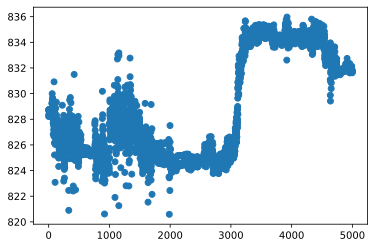

In [243]:
plt.plot(dist, 'o')

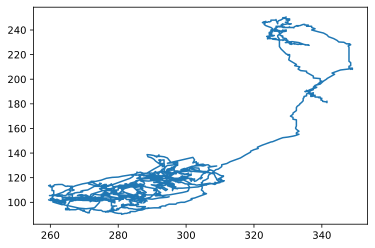

In [238]:
plt.plot(df.Y, df.X)

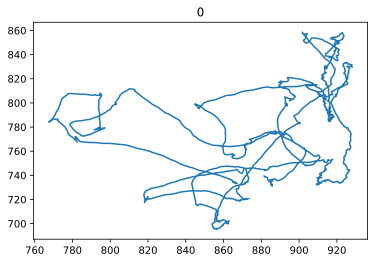

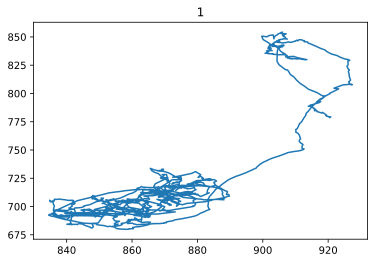

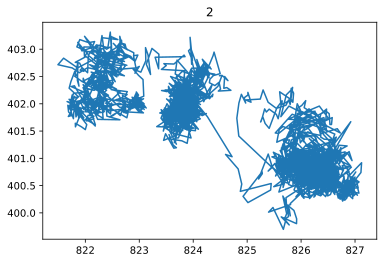

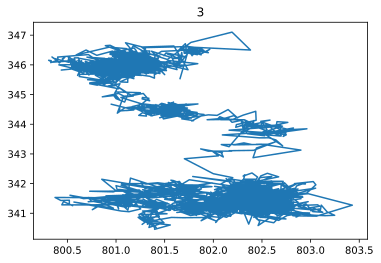

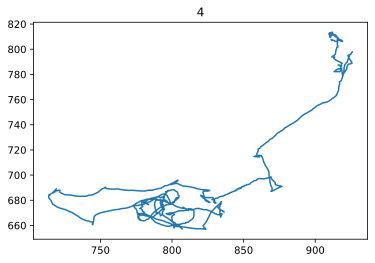

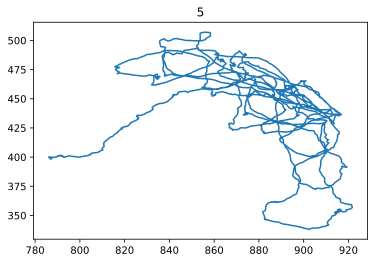

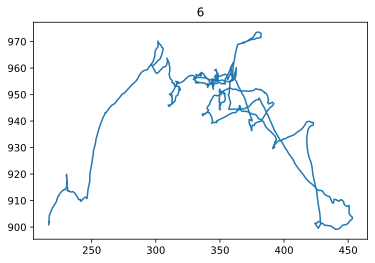

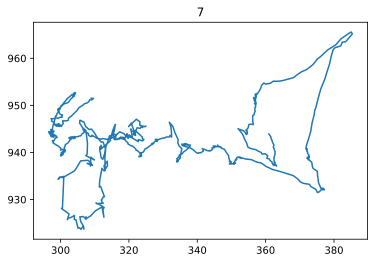

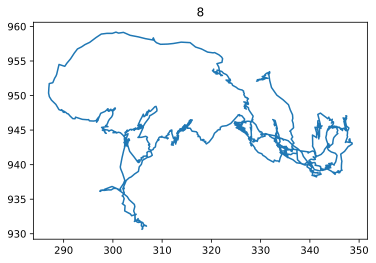

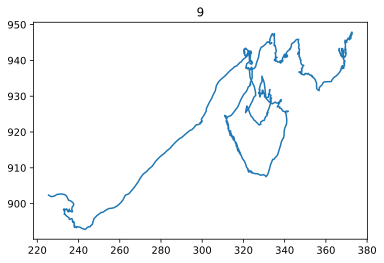

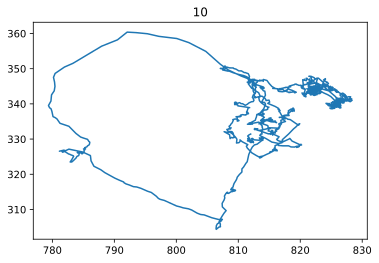

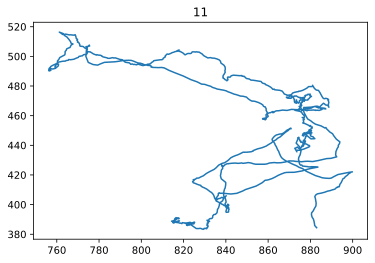

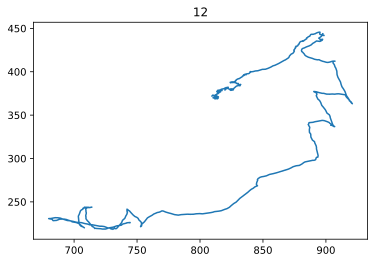

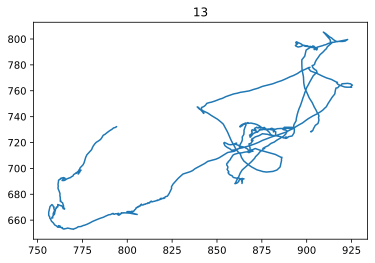

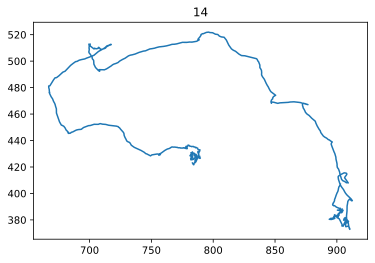

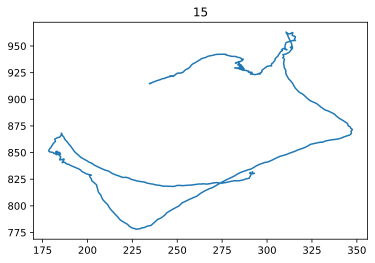

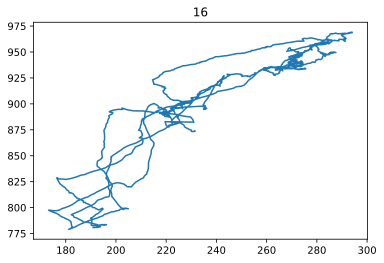

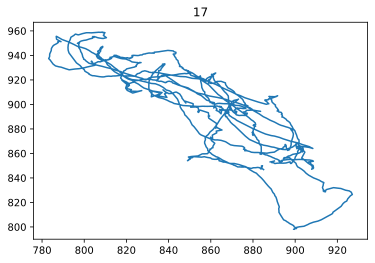

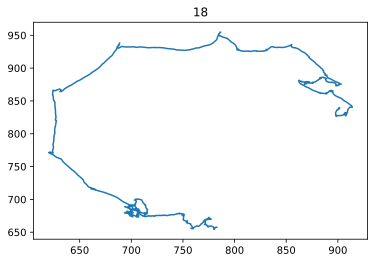

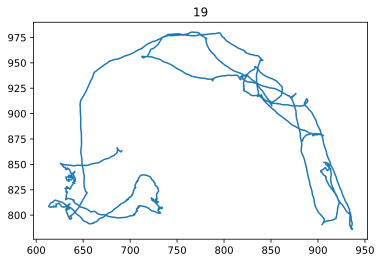

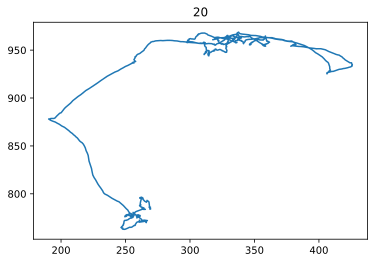

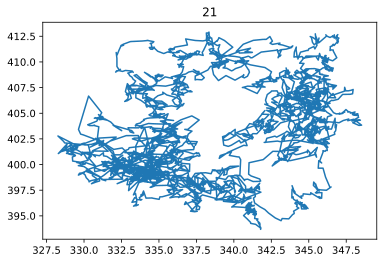

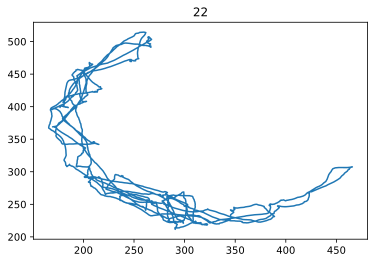

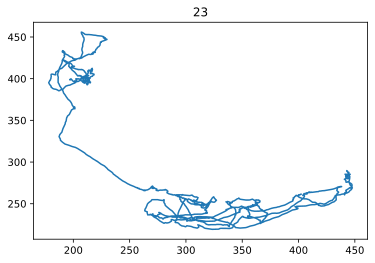

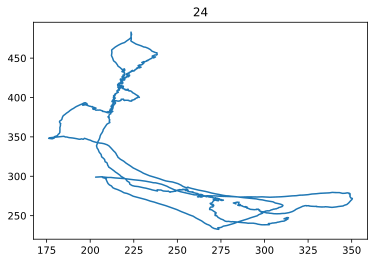

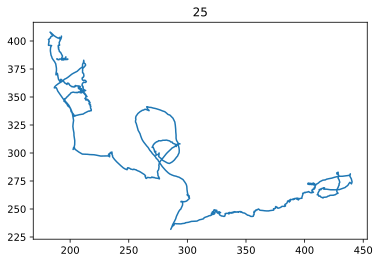

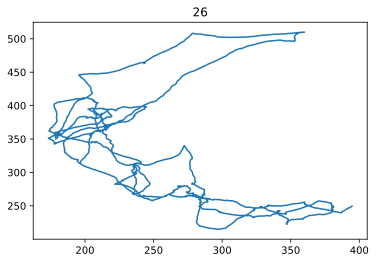

In [239]:
for fly in np.arange(tracker.n_flies):
    locs = dataset.query(f'ID == {fly}')
    plt.plot(locs.y, locs.x)
    plt.title(f'{fly}')
    plt.show()